### 1. 선형 회귀(Linear Regression)
https://wikidocs.net/21670

 다른 변수의 값을 변하게하는 변수를 
x
, 변수 
x
에 의해서 값이 종속적으로 변하는 변수 
y
라고 해봅시다.

이때 변수 
x
의 값은 독립적으로 변할 수 있는 것에 반해, 
y
값은 계속해서 
x
의 값에 의해서, 종속적으로 결정되므로 
x
를 독립 변수, 
y
를 종속 변수라고도 합니다. 선형 회귀는 한 개 이상의 독립 변수 
x
와 
y
의 선형 관계를 모델링합니다. 만약, 독립 변수 
x
가 1개라면 단순 선형 회귀라고 합니다.

- 단순선형회귀 분석 simple linear regression analysis\
y = wx + b\
y = x

- 다중선형회귀분석 multiple linear regression analysis\
y = w1x1 + w2x2 + ... wnxn + b


### hypotehsis 가설설정
H(x) = wx + b

In [1]:
# 선형회귀를 tensorflow & keras 로 구현

In [4]:
import tensorflow as tf

#tape_gradient() 자동미분기능 수행

w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5 # 임의로 2w**2 + 5 식 세움
    return z


In [5]:
with tf.GradientTape() as tape: # 미분
    z = f(w) # w에 대해 미분
    
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [6]:
# 자동미분 사용해서 선형회귀 구현

In [8]:
# 가중치 변수 w 와 b 선언
# 4와 1로 임의 초기화

w = tf.Variable(4.0)
b = tf.Variable(1.0)

#@tf.function
def hypothesis(x):
    return w*x + b

In [9]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [10]:
# 평균제곱오차를 손실함수로 정의
#@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [11]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [12]:
# 옵티마이저 경사하강법, lr = 0.01

optimizer = tf.optimizers.SGD(0.01)

In [16]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b])) # 체크

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 10.6671 | b의 값 : 0.908 | cost : 1.062102
epoch :  10 | w의 값 : 10.6677 | b의 값 : 0.9039 | cost : 1.061931
epoch :  20 | w의 값 : 10.6683 | b의 값 : 0.8999 | cost : 1.061765
epoch :  30 | w의 값 : 10.6689 | b의 값 : 0.8961 | cost : 1.061616
epoch :  40 | w의 값 : 10.6695 | b의 값 : 0.8924 | cost : 1.061478
epoch :  50 | w의 값 : 10.6701 | b의 값 : 0.8889 | cost : 1.061354
epoch :  60 | w의 값 : 10.6706 | b의 값 : 0.8856 | cost : 1.061237
epoch :  70 | w의 값 : 10.6711 | b의 값 : 0.8824 | cost : 1.061131
epoch :  80 | w의 값 : 10.6716 | b의 값 : 0.8793 | cost : 1.061027
epoch :  90 | w의 값 : 10.6721 | b의 값 : 0.8763 | cost : 1.060937
epoch : 100 | w의 값 : 10.6725 | b의 값 : 0.8734 | cost : 1.060852
epoch : 110 | w의 값 : 10.6730 | b의 값 : 0.8707 | cost : 1.060777
epoch : 120 | w의 값 : 10.6734 | b의 값 : 0.8681 | cost : 1.060702
epoch : 130 | w의 값 : 10.6738 | b의 값 : 0.8655 | cost : 1.060640
epoch : 140 | w의 값 : 10.6742 | b의 값 : 0.8631 | cost : 1.060583
epoch : 150 | w의 값 : 10.6746 | b의 값 : 0.8608 | cost : 1.

In [14]:
# x에 임의값 - 예측값 확인
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


### 케라스로 구현

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

/Users/young/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/300
1/1 [==============================] - 0s 214ms/step - loss: 4800.9434 - mse: 4800.9434
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 591.8721 - mse: 591.8721
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 73.9756 - mse: 73.9756
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 10.2505 - mse: 10.2505
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 2.4078 - mse: 2.4078
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 1.4411 - mse: 1.4411
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 1.3203 - mse: 1.3203
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 1.3037 - mse: 1.3037
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 1.3000 - mse: 1.3000
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2978 - mse: 1.2978
Epoch 11/300
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 4ms/step - loss: 1.1840 - mse: 1.1840
Epoch 90/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1830 - mse: 1.1830
Epoch 91/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1820 - mse: 1.1820
Epoch 92/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1810 - mse: 1.1810
Epoch 93/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1800 - mse: 1.1800
Epoch 94/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1790 - mse: 1.1790
Epoch 95/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1780 - mse: 1.1780
Epoch 96/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1771 - mse: 1.1771
Epoch 97/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1761 - mse: 1.1761
Epoch 98/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1751 - mse: 1.1751
Epoch 99/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1742 - ms

1/1 [==============================] - 0s 4ms/step - loss: 1.1205 - mse: 1.1205
Epoch 177/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1200 - mse: 1.1200
Epoch 178/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1195 - mse: 1.1195
Epoch 179/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1191 - mse: 1.1191
Epoch 180/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1186 - mse: 1.1186
Epoch 181/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1181 - mse: 1.1181
Epoch 182/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1176 - mse: 1.1176
Epoch 183/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1171 - mse: 1.1171
Epoch 184/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1167 - mse: 1.1167
Epoch 185/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1162 - mse: 1.1162
Epoch 186/300
1/1 [==============================] - 0s 2ms/step - loss: 1

1/1 [==============================] - 0s 2ms/step - loss: 1.0895 - mse: 1.0895
Epoch 264/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0893 - mse: 1.0893
Epoch 265/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0890 - mse: 1.0890
Epoch 266/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0888 - mse: 1.0888
Epoch 267/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0886 - mse: 1.0886
Epoch 268/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0883 - mse: 1.0883
Epoch 269/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0881 - mse: 1.0881
Epoch 270/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0879 - mse: 1.0879
Epoch 271/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0876 - mse: 1.0876
Epoch 272/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0874 - mse: 1.0874
Epoch 273/300
1/1 [==============================] - 0s 3ms/step - loss: 1

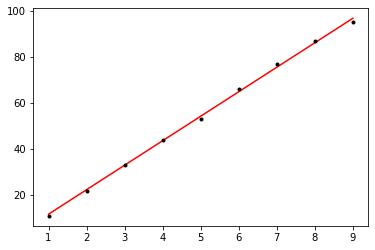

In [21]:
# 그래프 그리기 (학습된)
plt.plot(x, model.predict(x), 'r', x, y, 'k.')


In [20]:
print(model.predict([9.5]))
# 예측

[[102.13365]]


## 로지스틱회귀
### 케라스로 로지스틱회귀 구현

독립 변수 데이터를 
x
, 숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 
y
라고 해봅시다.



In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

/Users/young/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 0s 228ms/step - loss: 9.0447 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 3.6478 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2736 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2481 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2359 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2283 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2230 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2191 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2161 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 0.1906 - binary_accuracy: 0.9231
Epoch 80/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1905 - binary_accuracy: 0.9231
Epoch 81/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1904 - binary_accuracy: 0.9231
Epoch 82/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1902 - binary_accuracy: 0.9231
Epoch 83/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1901 - binary_accuracy: 0.9231
Epoch 84/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1900 - binary_accuracy: 0.9231
Epoch 85/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1899 - binary_accuracy: 0.9231
Epoch 86/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1897 - binary_accuracy: 0.9231
Epoch 87/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1896 - binary_accuracy: 0.9231
Epoch 88/200
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 0.1817 - binary_accuracy: 0.9231
Epoch 157/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1816 - binary_accuracy: 0.9231
Epoch 158/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1815 - binary_accuracy: 0.9231
Epoch 159/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1814 - binary_accuracy: 0.9231
Epoch 160/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1813 - binary_accuracy: 0.9231
Epoch 161/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1812 - binary_accuracy: 0.9231
Epoch 162/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1810 - binary_accuracy: 0.9231
Epoch 163/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1809 - binary_accuracy: 0.9231
Epoch 164/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1808 - binary_accuracy: 0.9231
Epoch 165/200
1/1 [==============================] - 0s 2ms/

그래프 선 옵션
그래프를 그릴 때 표시 되는 색이나 마커 패턴을 바꾸는 것 확인할 수 있다.

색상: b(파란색), g(초록색), r(빨간색), c(청록색), y(노란색), k(검은색), w(흰색)\
마커: o(원), v(역삼각형), ^(삼각형), s(네모), +(플러스), .(점)

https://todayisbetterthanyesterday.tistory.com/67

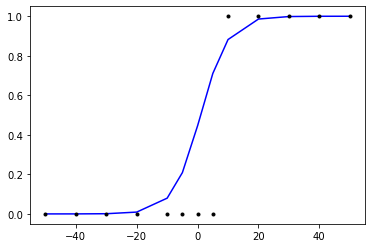

In [32]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')


x
의 값이 5와 10사이의 어떤 값일때 
y
값이 0.5가 넘기 시작하는 것처럼 보입니다. 정확도가 100%가 나왔었기 때문에 적어도 
x
의 값이 5일때는 
y
값이 0.5보다 작고, 
x
의 값이 10일 때는 
y
값이 0.5를 넘을 것입니다. 이제 
x
의 값이 5보다 작은 값일 때와 
x
의 값이 10보다 클 때에 대해서 
y
값을 출력해봅시다.

In [33]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.50159115]
 [0.55708224]
 [0.61118424]
 [0.66267926]
 [0.6871307 ]]
[[0.90343654]
 [0.9886334 ]
 [0.9987648 ]
 [0.99986696]
 [1.        ]]



x
의 값이 5보다 작을 때는 0.5보다 작은 값을, 
x
의 값이 10보다 클 때는 0.5보다 큰 값을 출력하는 것을 볼 수 있습니다

## 2. 다중입력에 대한 실습

독립변수 x가 2개 이상인 경우; 비용함수 (cost) & 옵티마이저 사용동일

### 2-1. 다중선형회귀

In [57]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

딥러닝 챕터-> 대부분 입력들은 독립변수가 2개 이상\
입력벡터의 차원이 2이상 (features)\
y를 결정하는데 있어 독립변수가 3개인 선형회귀 실습


H(X)=w1x1+w2x2+w3x3+b 3개의 특성을 가진 벡터 [x1,x2,x3]를 대문자X로 표기합니다.

In [63]:
# 5개 데이터 - 훈련/ 나머지 2개는 테스트에 사용

# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

# 1. 모델 구현
model = Sequential()
# 2. 선형회귀, act = linear, 1 (output 1개) input_dim =3 (features 3개)
model.add(Dense(1, input_dim=3, activation='linear')) # 선형

# 3. 경사하강
sgd = optimizers.SGD(lr=0.0001) 
# 4. 손실함수 loss function은 mse 평균제곱오차 사용
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
# 5. 구현 fit, epochs 2000번시도
hist = model.fit(X, y, epochs=2000)

model.summary()

### 학습 끝 ###

Epoch 1/2000
1/1 [==============================] - 0s 178ms/step - loss: 4205.2124 - mse: 4205.2124
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 2256.4851 - mse: 2256.4851
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 1220.1677 - mse: 1220.1677
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 667.8353 - mse: 667.8353
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 372.6334 - mse: 372.6334
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 214.3039 - mse: 214.3039
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 129.0082 - mse: 129.0082
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 82.7981 - mse: 82.7981
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 57.5818 - mse: 57.5818
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 43.6917 - mse: 43.6917
Epoch 11/2000
1/1 [========

1/1 [==============================] - 0s 2ms/step - loss: 15.7667 - mse: 15.7667
Epoch 87/2000
1/1 [==============================] - 0s 2ms/step - loss: 15.6615 - mse: 15.6615
Epoch 88/2000
1/1 [==============================] - 0s 2ms/step - loss: 15.5568 - mse: 15.5568
Epoch 89/2000
1/1 [==============================] - 0s 3ms/step - loss: 15.4530 - mse: 15.4530
Epoch 90/2000
1/1 [==============================] - 0s 4ms/step - loss: 15.3498 - mse: 15.3498
Epoch 91/2000
1/1 [==============================] - 0s 2ms/step - loss: 15.2473 - mse: 15.2473
Epoch 92/2000
1/1 [==============================] - 0s 2ms/step - loss: 15.1454 - mse: 15.1454
Epoch 93/2000
1/1 [==============================] - 0s 2ms/step - loss: 15.0443 - mse: 15.0443
Epoch 94/2000
1/1 [==============================] - 0s 2ms/step - loss: 14.9439 - mse: 14.9439
Epoch 95/2000
1/1 [==============================] - 0s 3ms/step - loss: 14.8441 - mse: 14.8441
Epoch 96/2000
1/1 [==============================] - 0

Epoch 171/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.9221 - mse: 8.9221
Epoch 172/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.8626 - mse: 8.8626
Epoch 173/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.8035 - mse: 8.8035
Epoch 174/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.7447 - mse: 8.7447
Epoch 175/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.6864 - mse: 8.6864
Epoch 176/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.6284 - mse: 8.6284
Epoch 177/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.5708 - mse: 8.5708
Epoch 178/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.5136 - mse: 8.5136
Epoch 179/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.4568 - mse: 8.4568
Epoch 180/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.4004 - mse: 8.4004
Epoch 181/2000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 5.0177 - mse: 5.0177
Epoch 258/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.9842 - mse: 4.9842
Epoch 259/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.9510 - mse: 4.9510
Epoch 260/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.9180 - mse: 4.9180
Epoch 261/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.8852 - mse: 4.8852
Epoch 262/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.8526 - mse: 4.8526
Epoch 263/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.8203 - mse: 4.8203
Epoch 264/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.7881 - mse: 4.7881
Epoch 265/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.7562 - mse: 4.7562
Epoch 266/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.7245 - mse: 4.7245
Epoch 267/2000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 2.8243 - mse: 2.8243
Epoch 344/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.8055 - mse: 2.8055
Epoch 345/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.7868 - mse: 2.7868
Epoch 346/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.7683 - mse: 2.7683
Epoch 347/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.7499 - mse: 2.7499
Epoch 348/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.7316 - mse: 2.7316
Epoch 349/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.7134 - mse: 2.7134
Epoch 350/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.6954 - mse: 2.6954
Epoch 351/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.6774 - mse: 2.6774
Epoch 352/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.6596 - mse: 2.6596
Epoch 353/2000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 2ms/step - loss: 1.5921 - mse: 1.5921
Epoch 430/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.5816 - mse: 1.5816
Epoch 431/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.5711 - mse: 1.5711
Epoch 432/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.5607 - mse: 1.5607
Epoch 433/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.5503 - mse: 1.5503
Epoch 434/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.5401 - mse: 1.5401
Epoch 435/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.5299 - mse: 1.5299
Epoch 436/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.5197 - mse: 1.5197
Epoch 437/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.5097 - mse: 1.5097
Epoch 438/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.4996 - mse: 1.4996
Epoch 439/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.9000 - mse: 0.9000
Epoch 516/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.8941 - mse: 0.8941
Epoch 517/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8882 - mse: 0.8882
Epoch 518/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8823 - mse: 0.8823
Epoch 519/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8765 - mse: 0.8765
Epoch 520/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8707 - mse: 0.8707
Epoch 521/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8650 - mse: 0.8650
Epoch 522/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8593 - mse: 0.8593
Epoch 523/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8536 - mse: 0.8536
Epoch 524/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8480 - mse: 0.8480
Epoch 525/2000
1/1 [==============================] - 0s 3ms/step

Epoch 601/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5112 - mse: 0.5112
Epoch 602/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5078 - mse: 0.5078
Epoch 603/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5045 - mse: 0.5045
Epoch 604/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5012 - mse: 0.5012
Epoch 605/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4980 - mse: 0.4980
Epoch 606/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4947 - mse: 0.4947
Epoch 607/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4915 - mse: 0.4915
Epoch 608/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4883 - mse: 0.4883
Epoch 609/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4851 - mse: 0.4851
Epoch 610/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4820 - mse: 0.4820
Epoch 611/2000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 0.2927 - mse: 0.2927
Epoch 688/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2909 - mse: 0.2909
Epoch 689/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2890 - mse: 0.2890
Epoch 690/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2872 - mse: 0.2872
Epoch 691/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2853 - mse: 0.2853
Epoch 692/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2835 - mse: 0.2835
Epoch 693/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2817 - mse: 0.2817
Epoch 694/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2799 - mse: 0.2799
Epoch 695/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2781 - mse: 0.2781
Epoch 696/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2763 - mse: 0.2763
Epoch 697/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.1700 - mse: 0.1700
Epoch 774/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1690 - mse: 0.1690
Epoch 775/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1679 - mse: 0.1679
Epoch 776/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1669 - mse: 0.1669
Epoch 777/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1659 - mse: 0.1659
Epoch 778/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1648 - mse: 0.1648
Epoch 779/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1638 - mse: 0.1638
Epoch 780/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1628 - mse: 0.1628
Epoch 781/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1618 - mse: 0.1618
Epoch 782/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1608 - mse: 0.1608
Epoch 783/2000
1/1 [==============================] - 0s 3ms/step

Epoch 859/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1011 - mse: 0.1011
Epoch 860/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1005 - mse: 0.1005
Epoch 861/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0999 - mse: 0.0999
Epoch 862/2000
1/1 [==============================] - ETA: 0s - loss: 0.0993 - mse: 0.099 - 0s 2ms/step - loss: 0.0993 - mse: 0.0993
Epoch 863/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0988 - mse: 0.0988
Epoch 864/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0982 - mse: 0.0982
Epoch 865/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0976 - mse: 0.0976
Epoch 866/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0970 - mse: 0.0970
Epoch 867/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0965 - mse: 0.0965
Epoch 868/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0959 - mse: 0.0959
Epoch 869/20

1/1 [==============================] - 0s 1ms/step - loss: 0.0627 - mse: 0.0627
Epoch 945/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0624 - mse: 0.0624
Epoch 946/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0620 - mse: 0.0620
Epoch 947/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0617 - mse: 0.0617
Epoch 948/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0614 - mse: 0.0614
Epoch 949/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0611 - mse: 0.0611
Epoch 950/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0607 - mse: 0.0607
Epoch 951/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0604 - mse: 0.0604
Epoch 952/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0601 - mse: 0.0601
Epoch 953/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0598 - mse: 0.0598
Epoch 954/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0408 - mse: 0.0408
Epoch 1031/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0406 - mse: 0.0406
Epoch 1032/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0404
Epoch 1033/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0402 - mse: 0.0402
Epoch 1034/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0401 - mse: 0.0401
Epoch 1035/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0399 - mse: 0.0399
Epoch 1036/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0397 - mse: 0.0397
Epoch 1037/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0395 - mse: 0.0395
Epoch 1038/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0393 - mse: 0.0393
Epoch 1039/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0392 - mse: 0.0392
Epoch 1040/2000
1/1 [==============================] - 0

Epoch 1115/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0286 - mse: 0.0286
Epoch 1116/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0285 - mse: 0.0285
Epoch 1117/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0284 - mse: 0.0284
Epoch 1118/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283
Epoch 1119/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282
Epoch 1120/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.0281
Epoch 1121/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0280 - mse: 0.0280
Epoch 1122/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0279 - mse: 0.0279
Epoch 1123/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0278 - mse: 0.0278
Epoch 1124/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0277 - mse: 0.0277
Epoch 1125/2000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 0.0217 - mse: 0.0217
Epoch 1201/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0216 - mse: 0.0216
Epoch 1202/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0216 - mse: 0.0216
Epoch 1203/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0215 - mse: 0.0215
Epoch 1204/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0215 - mse: 0.0215
Epoch 1205/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0214 - mse: 0.0214
Epoch 1206/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0213 - mse: 0.0213
Epoch 1207/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0213 - mse: 0.0213
Epoch 1208/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.0212
Epoch 1209/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.0212
Epoch 1210/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0178 - mse: 0.0178
Epoch 1286/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 1287/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0177 - mse: 0.0177
Epoch 1288/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 1289/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0176 - mse: 0.0176
Epoch 1290/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0176 - mse: 0.0176
Epoch 1291/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0176 - mse: 0.0176
Epoch 1292/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0176 - mse: 0.0176
Epoch 1293/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0175 - mse: 0.0175
Epoch 1294/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0175 - mse: 0.0175
Epoch 1295/2000
1/1 [==============================] - 0

Epoch 1370/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1371/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1372/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1373/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1374/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1375/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1376/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1377/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0154 - mse: 0.0154
Epoch 1378/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0154 - mse: 0.0154
Epoch 1379/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0154 - mse: 0.0154
Epoch 1380/2000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1456/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1457/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1458/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1459/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1460/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1461/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1462/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1463/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1464/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1465/2000
1/1 [==============================] - 0

Epoch 1540/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1541/2000
1/1 [==============================] - ETA: 0s - loss: 0.0136 - mse: 0.013 - 0s 4ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1542/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1543/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1544/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1545/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1546/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1547/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1548/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1549/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0135 - mse: 0.0135
Ep

1/1 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1625/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1626/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1627/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1628/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1629/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1630/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1631/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1632/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1633/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1634/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1710/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1711/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1712/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1713/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1714/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1715/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1716/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1717/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1718/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129 - mse: 0.0129
Epoch 1719/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1795/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1796/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1797/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1798/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1799/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1800/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1801/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1802/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1803/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1804/2000
1/1 [==============================] - E

Epoch 1879/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1880/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1881/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128
Epoch 1882/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1883/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1884/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1885/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1886/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1887/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1888/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1889/2000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1965/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1966/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1967/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1968/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1969/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1970/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1971/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1972/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1973/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1974/2000
1/1 [==============================] - 0

In [59]:
### 훈련한 데이터로 예측 시작 ###

print(model.predict(X))

[[72.94091 ]
 [81.97257 ]
 [72.08913 ]
 [57.11352 ]
 [33.808006]]


In [64]:
print(hist.history.keys())

dict_keys(['loss', 'mse'])


In [65]:
W_, b_ = model.get_weights()

In [68]:
print(W_)
print(b_)

[[0.39334032]
 [0.4034761 ]
 [1.0041083 ]]
[0.06344081]


In [79]:
# 다중선형회귀 그래프 1) 선 그래프(plot); 2) 산점도 그래프 scatter

xs = np.array(X[:, 0], dtype=np.float32)
xy = np.array(X[:, 1], dtype=np.float32)
xz = np.array(X[:, 2], dtype=np.float32)

#x_data = np.array(X[:,1:2], dtype=np.float32)
#y_data = np.array(X[:, 2], dtype=np.float32)
#y_data = y_data.reshape((25,1))


x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x,y))
Z = np.matmul(X, W_) + b

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, xy, xz)
ax.scatter(x, y, Z)
ax.set_xlabel('중간')
ax.set_ylabel('기말')
ax.set_zlabel('가산점')
ax.view_init(15, 15)

plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
# 다중선형회귀 그래프 1) 선 그래프(plot); 2) 산점도 그래프 scatter

xs = np.array(X[:, 0], dtype=np.float32)
xy = np.array(X[:, 1], dtype=np.float32)
xz = np.array(X[:, 2], dtype=np.float32)

#x_data = np.array(X[:,1:2], dtype=np.float32)
#y_data = np.array(X[:, 2], dtype=np.float32)
#y_data = y_data.reshape((25,1))


#x = np.linspace(20, 100, 50).reshape(50,1)
#y = np.linspace(10, 70, 50).reshape(50,1)

#X = np.concatenate((x,y))
Z = np.matmul(X, W_) + b

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, xy, xz)
ax.scatter(x, y, Z)
ax.set_xlabel('중간')
ax.set_ylabel('기말')
ax.set_zlabel('가산점')
ax.view_init(15, 15)

plt.show()

https://sdc-james.gitbook.io/onebook/4.-and/5.4.-tensorflow/5.4.1.-keras

!!! 다시체크

https://lovelydiary.tistory.com/346

In [ ]:
# 알아내고싶은것,
# 텐서플로우 사용하여, 데이터를 하나의 직선으로 표현

#1. 읽은 데이터 변환
#2. placeholder로 X,Y도 선언하기



In [38]:
# 실제 비슷하게 나오는 것 확인

In [40]:
### 테스트 데이터로 예측 시작 ###
X_test = np.array([[20,99,10], [40, 50,20]])
print(model.predict(X_test))

[[57.931282]
 [56.045807]]


### 2-2. 다중로지스틱회귀

를 결정하는데 있어 독립 변수 x가 2개인 로지스틱 회귀를 풀어봅시다.
꽃받침(Sepal)의 길이와 꽃잎(Petal)의 길이와 해당 꽃이 A인지 B인지가 적혀져 있는 데이터가 있을 때, 새로 조사한 꽃받침의 길이와 꽃잎의 길이로부터 무슨 꽃인지 예측할 수 있는 모델을 만들고자 한다면 이때 독립 변수 
x는 2개가 됩니다.

https://wikidocs.net/35821

In [94]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model2 = Sequential()
model2.add(Dense(1, input_dim=2, activation='sigmoid'))
model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

hist_logis = model2.fit(X, y, epochs=2000)


model2.summary()

Epoch 1/2000
1/1 [==============================] - 0s 207ms/step - loss: 0.6110 - binary_accuracy: 0.6667
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6107 - binary_accuracy: 0.6667
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6105 - binary_accuracy: 0.6667
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6102 - binary_accuracy: 0.6667
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6099 - binary_accuracy: 0.6667
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6097 - binary_accuracy: 0.6667
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6094 - binary_accuracy: 0.6667
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6091 - binary_accuracy: 0.6667
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6089 - binary_accuracy: 0.6667
Epoch 10/2000
1/1 [==============================] - 

1/1 [==============================] - 0s 2ms/step - loss: 0.5916 - binary_accuracy: 0.6667
Epoch 79/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5913 - binary_accuracy: 0.6667
Epoch 80/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5911 - binary_accuracy: 0.6667
Epoch 81/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5909 - binary_accuracy: 0.6667
Epoch 82/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5906 - binary_accuracy: 0.6667
Epoch 83/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5904 - binary_accuracy: 0.6667
Epoch 84/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5901 - binary_accuracy: 0.6667
Epoch 85/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5899 - binary_accuracy: 0.6667
Epoch 86/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5897 - binary_accuracy: 0.6667
Epoch 87/2000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: 0.5742 - binary_accuracy: 0.6667
Epoch 155/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5740 - binary_accuracy: 0.6667
Epoch 156/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5738 - binary_accuracy: 0.6667
Epoch 157/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5736 - binary_accuracy: 0.6667
Epoch 158/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5734 - binary_accuracy: 0.6667
Epoch 159/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5731 - binary_accuracy: 0.6667
Epoch 160/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5729 - binary_accuracy: 0.6667
Epoch 161/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5727 - binary_accuracy: 0.6667
Epoch 162/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5725 - binary_accuracy: 0.6667
Epoch 163/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5583 - binary_accuracy: 0.6667
Epoch 231/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5581 - binary_accuracy: 0.6667
Epoch 232/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5579 - binary_accuracy: 0.6667
Epoch 233/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5577 - binary_accuracy: 0.6667
Epoch 234/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5575 - binary_accuracy: 0.6667
Epoch 235/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5573 - binary_accuracy: 0.6667
Epoch 236/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5571 - binary_accuracy: 0.6667
Epoch 237/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5569 - binary_accuracy: 0.6667
Epoch 238/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5567 - binary_accuracy: 0.6667
Epoch 239/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5436 - binary_accuracy: 0.6667
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5434 - binary_accuracy: 0.6667
Epoch 308/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5432 - binary_accuracy: 0.6667
Epoch 309/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5430 - binary_accuracy: 0.6667
Epoch 310/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5428 - binary_accuracy: 0.6667
Epoch 311/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5426 - binary_accuracy: 0.6667
Epoch 312/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5425 - binary_accuracy: 0.6667
Epoch 313/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5423 - binary_accuracy: 0.6667
Epoch 314/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5421 - binary_accuracy: 0.6667
Epoch 315/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5298 - binary_accuracy: 0.6667
Epoch 383/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5297 - binary_accuracy: 0.6667
Epoch 384/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5295 - binary_accuracy: 0.6667
Epoch 385/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5293 - binary_accuracy: 0.6667
Epoch 386/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5291 - binary_accuracy: 0.6667
Epoch 387/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5290 - binary_accuracy: 0.6667
Epoch 388/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5288 - binary_accuracy: 0.6667
Epoch 389/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5286 - binary_accuracy: 0.6667
Epoch 390/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5284 - binary_accuracy: 0.6667
Epoch 391/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5170 - binary_accuracy: 0.6667
Epoch 459/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5168 - binary_accuracy: 0.6667
Epoch 460/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5166 - binary_accuracy: 0.6667
Epoch 461/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5165 - binary_accuracy: 0.6667
Epoch 462/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5163 - binary_accuracy: 0.6667
Epoch 463/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5161 - binary_accuracy: 0.6667
Epoch 464/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5160 - binary_accuracy: 0.6667
Epoch 465/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5158 - binary_accuracy: 0.6667
Epoch 466/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5156 - binary_accuracy: 0.6667
Epoch 467/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5048 - binary_accuracy: 0.6667
Epoch 535/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5047 - binary_accuracy: 0.6667
Epoch 536/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5045 - binary_accuracy: 0.6667
Epoch 537/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5044 - binary_accuracy: 0.6667
Epoch 538/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5042 - binary_accuracy: 0.6667
Epoch 539/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5040 - binary_accuracy: 0.6667
Epoch 540/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5039 - binary_accuracy: 0.6667
Epoch 541/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5037 - binary_accuracy: 0.6667
Epoch 542/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5036 - binary_accuracy: 0.6667
Epoch 543/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.4934 - binary_accuracy: 0.6667
Epoch 611/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4932 - binary_accuracy: 0.6667
Epoch 612/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4931 - binary_accuracy: 0.6667
Epoch 613/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4929 - binary_accuracy: 0.6667
Epoch 614/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4928 - binary_accuracy: 0.6667
Epoch 615/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4926 - binary_accuracy: 0.6667
Epoch 616/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4925 - binary_accuracy: 0.6667
Epoch 617/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4923 - binary_accuracy: 0.6667
Epoch 618/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4922 - binary_accuracy: 0.6667
Epoch 619/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.4825 - binary_accuracy: 0.6667
Epoch 687/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4824 - binary_accuracy: 0.6667
Epoch 688/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4822 - binary_accuracy: 0.6667
Epoch 689/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4821 - binary_accuracy: 0.6667
Epoch 690/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4819 - binary_accuracy: 0.6667
Epoch 691/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4818 - binary_accuracy: 0.6667
Epoch 692/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4817 - binary_accuracy: 0.6667
Epoch 693/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4815 - binary_accuracy: 0.6667
Epoch 694/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4814 - binary_accuracy: 0.6667
Epoch 695/2000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.4722 - binary_accuracy: 0.6667
Epoch 763/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4720 - binary_accuracy: 0.6667
Epoch 764/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4719 - binary_accuracy: 0.6667
Epoch 765/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4718 - binary_accuracy: 0.6667
Epoch 766/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4716 - binary_accuracy: 0.6667
Epoch 767/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4715 - binary_accuracy: 0.6667
Epoch 768/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4714 - binary_accuracy: 0.6667
Epoch 769/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4713 - binary_accuracy: 0.6667
Epoch 770/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4711 - binary_accuracy: 0.6667
Epoch 771/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.4624 - binary_accuracy: 0.6667
Epoch 839/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4622 - binary_accuracy: 0.6667
Epoch 840/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4621 - binary_accuracy: 0.6667
Epoch 841/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4620 - binary_accuracy: 0.6667
Epoch 842/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4619 - binary_accuracy: 0.6667
Epoch 843/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4617 - binary_accuracy: 0.6667
Epoch 844/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4616 - binary_accuracy: 0.6667
Epoch 845/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4615 - binary_accuracy: 0.6667
Epoch 846/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4614 - binary_accuracy: 0.6667
Epoch 847/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.4530 - binary_accuracy: 0.8333
Epoch 915/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4529 - binary_accuracy: 0.8333
Epoch 916/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4528 - binary_accuracy: 0.8333
Epoch 917/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4526 - binary_accuracy: 0.8333
Epoch 918/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4525 - binary_accuracy: 0.8333
Epoch 919/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4524 - binary_accuracy: 0.8333
Epoch 920/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4523 - binary_accuracy: 0.8333
Epoch 921/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4522 - binary_accuracy: 0.8333
Epoch 922/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4520 - binary_accuracy: 0.8333
Epoch 923/2000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.4441 - binary_accuracy: 0.8333
Epoch 991/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4440 - binary_accuracy: 0.8333
Epoch 992/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4438 - binary_accuracy: 0.8333
Epoch 993/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4437 - binary_accuracy: 0.8333
Epoch 994/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4436 - binary_accuracy: 0.8333
Epoch 995/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4435 - binary_accuracy: 0.8333
Epoch 996/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4434 - binary_accuracy: 0.8333
Epoch 997/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4433 - binary_accuracy: 0.8333
Epoch 998/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4432 - binary_accuracy: 0.8333
Epoch 999/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.4355 - binary_accuracy: 0.8333
Epoch 1067/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4354 - binary_accuracy: 0.8333
Epoch 1068/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4353 - binary_accuracy: 0.8333
Epoch 1069/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4352 - binary_accuracy: 0.8333
Epoch 1070/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4351 - binary_accuracy: 0.8333
Epoch 1071/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4350 - binary_accuracy: 0.8333
Epoch 1072/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4349 - binary_accuracy: 0.8333
Epoch 1073/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4348 - binary_accuracy: 0.8333
Epoch 1074/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4347 - binary_accuracy: 0.8333
Epoch 1075/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4275 - binary_accuracy: 0.8333
Epoch 1142/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4274 - binary_accuracy: 0.8333
Epoch 1143/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4273 - binary_accuracy: 0.8333
Epoch 1144/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4272 - binary_accuracy: 0.8333
Epoch 1145/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4270 - binary_accuracy: 0.8333
Epoch 1146/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4269 - binary_accuracy: 0.8333
Epoch 1147/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4268 - binary_accuracy: 0.8333
Epoch 1148/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4267 - binary_accuracy: 0.8333
Epoch 1149/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4266 - binary_accuracy: 0.8333
Epoch 1150/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4197 - binary_accuracy: 1.0000
Epoch 1217/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4196 - binary_accuracy: 1.0000
Epoch 1218/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4195 - binary_accuracy: 1.0000
Epoch 1219/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4194 - binary_accuracy: 1.0000
Epoch 1220/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4193 - binary_accuracy: 1.0000
Epoch 1221/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4192 - binary_accuracy: 1.0000
Epoch 1222/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4191 - binary_accuracy: 1.0000
Epoch 1223/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4190 - binary_accuracy: 1.0000
Epoch 1224/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4189 - binary_accuracy: 1.0000
Epoch 1225/2000
1/1 [=======================

Epoch 1292/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4122 - binary_accuracy: 1.0000
Epoch 1293/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4121 - binary_accuracy: 1.0000
Epoch 1294/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4120 - binary_accuracy: 1.0000
Epoch 1295/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4119 - binary_accuracy: 1.0000
Epoch 1296/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4118 - binary_accuracy: 1.0000
Epoch 1297/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4117 - binary_accuracy: 1.0000
Epoch 1298/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.4116 - binary_accuracy: 1.0000
Epoch 1299/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4115 - binary_accuracy: 1.0000
Epoch 1300/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4114 - binary_accuracy: 1.0000
Epoch 1301/2000
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 0.4051 - binary_accuracy: 1.0000
Epoch 1368/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4050 - binary_accuracy: 1.0000
Epoch 1369/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4049 - binary_accuracy: 1.0000
Epoch 1370/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4048 - binary_accuracy: 1.0000
Epoch 1371/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4047 - binary_accuracy: 1.0000
Epoch 1372/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4046 - binary_accuracy: 1.0000
Epoch 1373/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4045 - binary_accuracy: 1.0000
Epoch 1374/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4044 - binary_accuracy: 1.0000
Epoch 1375/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4044 - binary_accuracy: 1.0000
Epoch 1376/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3982 - binary_accuracy: 1.0000
Epoch 1444/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3981 - binary_accuracy: 1.0000
Epoch 1445/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3980 - binary_accuracy: 1.0000
Epoch 1446/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3979 - binary_accuracy: 1.0000
Epoch 1447/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3978 - binary_accuracy: 1.0000
Epoch 1448/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3977 - binary_accuracy: 1.0000
Epoch 1449/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3976 - binary_accuracy: 1.0000
Epoch 1450/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3975 - binary_accuracy: 1.0000
Epoch 1451/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3974 - binary_accuracy: 1.0000
Epoch 1452/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3915 - binary_accuracy: 1.0000
Epoch 1520/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3914 - binary_accuracy: 1.0000
Epoch 1521/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3913 - binary_accuracy: 1.0000
Epoch 1522/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3912 - binary_accuracy: 1.0000
Epoch 1523/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3911 - binary_accuracy: 1.0000
Epoch 1524/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3910 - binary_accuracy: 1.0000
Epoch 1525/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3910 - binary_accuracy: 1.0000
Epoch 1526/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3909 - binary_accuracy: 1.0000
Epoch 1527/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3908 - binary_accuracy: 1.0000
Epoch 1528/2000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.3851 - binary_accuracy: 1.0000
Epoch 1596/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3850 - binary_accuracy: 1.0000
Epoch 1597/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3849 - binary_accuracy: 1.0000
Epoch 1598/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3848 - binary_accuracy: 1.0000
Epoch 1599/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3847 - binary_accuracy: 1.0000
Epoch 1600/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3846 - binary_accuracy: 1.0000
Epoch 1601/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3846 - binary_accuracy: 1.0000
Epoch 1602/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3845 - binary_accuracy: 1.0000
Epoch 1603/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3844 - binary_accuracy: 1.0000
Epoch 1604/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3789 - binary_accuracy: 1.0000
Epoch 1671/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3789 - binary_accuracy: 1.0000
Epoch 1672/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3788 - binary_accuracy: 1.0000
Epoch 1673/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3787 - binary_accuracy: 1.0000
Epoch 1674/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3786 - binary_accuracy: 1.0000
Epoch 1675/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3785 - binary_accuracy: 1.0000
Epoch 1676/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3785 - binary_accuracy: 1.0000
Epoch 1677/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3784 - binary_accuracy: 1.0000
Epoch 1678/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3783 - binary_accuracy: 1.0000
Epoch 1679/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3730 - binary_accuracy: 1.0000
Epoch 1747/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3729 - binary_accuracy: 1.0000
Epoch 1748/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3728 - binary_accuracy: 1.0000
Epoch 1749/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3727 - binary_accuracy: 1.0000
Epoch 1750/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3727 - binary_accuracy: 1.0000
Epoch 1751/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3726 - binary_accuracy: 1.0000
Epoch 1752/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3725 - binary_accuracy: 1.0000
Epoch 1753/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3724 - binary_accuracy: 1.0000
Epoch 1754/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3723 - binary_accuracy: 1.0000
Epoch 1755/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3673 - binary_accuracy: 1.0000
Epoch 1822/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3672 - binary_accuracy: 1.0000
Epoch 1823/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3671 - binary_accuracy: 1.0000
Epoch 1824/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3670 - binary_accuracy: 1.0000
Epoch 1825/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3670 - binary_accuracy: 1.0000
Epoch 1826/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3669 - binary_accuracy: 1.0000
Epoch 1827/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3668 - binary_accuracy: 1.0000
Epoch 1828/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3668 - binary_accuracy: 1.0000
Epoch 1829/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3667 - binary_accuracy: 1.0000
Epoch 1830/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.3618 - binary_accuracy: 1.0000
Epoch 1897/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3617 - binary_accuracy: 1.0000
Epoch 1898/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3616 - binary_accuracy: 1.0000
Epoch 1899/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3616 - binary_accuracy: 1.0000
Epoch 1900/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3615 - binary_accuracy: 1.0000
Epoch 1901/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3614 - binary_accuracy: 1.0000
Epoch 1902/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3613 - binary_accuracy: 1.0000
Epoch 1903/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3613 - binary_accuracy: 1.0000
Epoch 1904/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3612 - binary_accuracy: 1.0000
Epoch 1905/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3564 - binary_accuracy: 1.0000
Epoch 1973/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3563 - binary_accuracy: 1.0000
Epoch 1974/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3563 - binary_accuracy: 1.0000
Epoch 1975/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3562 - binary_accuracy: 1.0000
Epoch 1976/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3561 - binary_accuracy: 1.0000
Epoch 1977/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3560 - binary_accuracy: 1.0000
Epoch 1978/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3560 - binary_accuracy: 1.0000
Epoch 1979/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3559 - binary_accuracy: 1.0000
Epoch 1980/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3558 - binary_accuracy: 1.0000
Epoch 1981/2000
1/1 [=======================

In [95]:
print(hist_logis.history.keys())

dict_keys(['loss', 'binary_accuracy'])


In [96]:
W_, b_ = model2.get_weights()
print(W_)
print(b_)

[[1.4488112]
 [1.4337854]]
[-1.6645019]


In [97]:
print(model2.predict(X))

[[0.15915862]
 [0.4425754 ]
 [0.4462854 ]
 [0.76907027]
 [0.77172804]
 [0.77436423]]


2000에포크 정도로 학습을 멈추고 각 입력에 대해서 출력값이 0.5보다 크고 작은지를 확인해보겠습니다.
입력의 합이 2이상인 경우에는 전부 값이 0.5를 넘는 것을 볼 수 있습니다.

